In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
residues_data = pd.DataFrame({})

# gain the path information
root = Path().resolve()
path = root/'test'/'S01'

# read multiple files
for p in path.iterdir():
    if p.name != 'structure.pdb':
        temp_table = pd.read_table(p, header=None, names=['#1', '#2'])
        temp_array = (list)(temp_table['#2'])
        residues_data[p.name] = temp_array
        warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [3]:
residues_data

,ARG_4,LYS_5,ARG_40,ARG_60,ARG_76,ASP_33,ASP_34,ASP_48,ASP_56,ASP_92,...,TYR_360,TYR_407,TYR_424,TYR_432,TYR_460,TYR_467,TYR_488,TYR_515,TYR_543,TYR_545
0,15.72,12.63,14.02,12.42,13.19,3.37,2.73,2.70,3.99,2.69,...,13.75,13.42,11.83,13.96,10.48,14.34,12.25,12.25,10.03,11.16
1,16.29,12.31,14.34,12.45,13.24,3.41,2.67,2.68,3.07,3.11,...,13.48,12.52,11.78,15.13,10.57,13.91,12.61,12.71,10.04,11.00
2,17.14,12.50,14.05,12.35,13.30,3.34,3.73,3.39,3.14,3.12,...,13.50,12.71,11.63,13.71,10.49,14.34,12.94,12.92,10.13,12.86
3,15.75,12.47,14.51,12.42,14.06,3.63,2.54,2.76,3.93,2.47,...,13.76,12.56,11.35,13.84,9.60,14.71,12.46,12.82,10.36,12.50
4,16.63,12.43,14.28,14.02,13.35,3.71,2.69,2.35,2.36,3.12,...,13.27,12.57,11.65,13.54,10.28,14.58,12.72,12.69,10.40,12.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,15.77,12.58,14.07,13.83,13.24,3.55,3.36,4.24,2.60,2.32,...,12.62,11.47,12.17,14.67,10.28,14.24,12.94,13.05,10.36,12.00
597,16.11,12.86,14.50,12.90,13.24,3.45,2.83,3.63,3.59,1.74,...,12.49,11.62,12.10,14.84,10.46,14.21,12.61,12.83,10.41,12.79
598,16.84,11.59,14.33,14.33,13.59,4.11,3.70,2.57,2.19,1.56,...,12.67,12.17,11.20,14.58,10.32,13.97,12.81,12.27,9.85,12.58
599,16.77,11.19,14.61,13.32,13.43,3.34,2.76,2.56,3.07,1.82,...,13.06,11.13,11.69,13.27,10.41,14.41,12.68,12.89,10.36,12.27


In [4]:
# do Pearson correlation analysis for all the data
correlation_matrix_whole = residues_data.corr(method='pearson')

In [5]:
correlation_matrix_whole

,ARG_4,LYS_5,ARG_40,ARG_60,ARG_76,ASP_33,ASP_34,ASP_48,ASP_56,ASP_92,...,TYR_360,TYR_407,TYR_424,TYR_432,TYR_460,TYR_467,TYR_488,TYR_515,TYR_543,TYR_545
ARG_4,1.000000,0.022482,-0.043577,0.109978,-0.066509,0.073386,-0.032133,-0.018366,-0.057741,0.060356,...,-0.084244,0.094439,0.075621,0.042759,0.002670,-0.258831,-0.025247,-0.055556,0.016374,-0.046250
LYS_5,0.022482,1.000000,0.035684,-0.142145,-0.037226,-0.036198,0.039698,-0.066802,0.135466,0.073068,...,0.083185,0.015582,-0.039800,-0.064914,0.051517,0.010304,0.027793,0.007445,-0.054542,-0.001832
ARG_40,-0.043577,0.035684,1.000000,-0.064036,0.022518,0.037668,0.041000,-0.066120,0.066639,-0.001724,...,0.053863,-0.060625,0.032739,0.040621,0.020558,-0.025280,0.013437,0.033396,0.038612,0.015011
ARG_60,0.109978,-0.142145,-0.064036,1.000000,-0.027229,0.008821,-0.088444,-0.293590,-0.648526,-0.039680,...,-0.184945,0.041835,0.102181,-0.023765,-0.015913,0.022307,0.044821,-0.008703,0.062439,0.083875
ARG_76,-0.066509,-0.037226,0.022518,-0.027229,1.000000,-0.016218,-0.054094,0.025693,0.020667,-0.511182,...,0.056824,-0.093877,-0.034205,0.031299,0.029735,-0.006837,-0.052043,0.014813,0.041235,0.015433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TYR_467,-0.258831,0.010304,-0.025280,0.022307,-0.006837,-0.035475,-0.005858,0.012212,-0.009571,-0.006732,...,0.037205,0.005074,-0.038138,-0.386374,-0.025051,1.000000,0.160156,-0.044619,0.030473,-0.013060
TYR_488,-0.025247,0.027793,0.013437,0.044821,-0.052043,-0.065715,0.037856,-0.038891,0.011982,-0.038277,...,-0.095030,0.004577,-0.017241,-0.044370,0.018548,0.160156,1.000000,-0.011530,-0.022324,0.058558
TYR_515,-0.055556,0.007445,0.033396,-0.008703,0.014813,0.070760,-0.019173,0.017098,-0.022539,-0.022626,...,-0.006399,0.023002,-0.019157,0.033959,-0.004170,-0.044619,-0.011530,1.000000,-0.081588,-0.001755
TYR_543,0.016374,-0.054542,0.038612,0.062439,0.041235,0.026209,-0.068049,-0.052607,-0.040907,0.002699,...,-0.009880,-0.044265,-0.009316,-0.076480,-0.051777,0.030473,-0.022324,-0.081588,1.000000,0.118440


In [6]:
# filter pairs of residues with a threshold of 0.8
def get_high_corr_features(corr_matrix, threshold=0.8):
    corr_pairs = corr_matrix.stack().reset_index()
    corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
    filtered_pairs = corr_pairs[
        (corr_pairs['Correlation'].abs() > threshold) &
        (corr_pairs['Feature1'] != corr_pairs['Feature2'])
    ].sort_values(by='Correlation', ascending=False)
    return filtered_pairs.drop_duplicates(subset=['Correlation'])

In [7]:
test_features = get_high_corr_features(correlation_matrix_whole)

feature_1_array = (list)(test_features['Feature1'])
feature_2_array = (list)(test_features['Feature2'])

high_features_array = list(set(feature_1_array + feature_2_array))

print(test_features)
print(high_features_array)

      Feature1 Feature2  Correlation
7021   ARG_585  ASP_522    -0.819075
16551  GLU_472  HIS_478    -0.823668
17791  HIS_172  GLU_166    -0.911223
21078  LYS_408  ASP_459    -0.920242
972     ASP_34   LYS_90    -0.927971
9610   ASP_340  LYS_396    -0.929024
['ASP_459', 'HIS_172', 'LYS_408', 'ARG_585', 'ASP_34', 'LYS_396', 'ASP_340', 'HIS_478', 'GLU_472', 'ASP_522', 'LYS_90', 'GLU_166']


In [8]:
high_corr_df = residues_data[high_features_array]

print(high_corr_df)

     ASP_459  HIS_172  LYS_408  ARG_585  ASP_34  LYS_396  ASP_340  HIS_478  \
0       4.04     5.04    10.63    11.98    2.73    11.37     2.71     5.73   
1       3.99     5.15    10.53    12.26    2.67    11.37     2.53     5.83   
2       3.85     5.40    11.12    12.09    3.73    11.41     2.50     4.79   
3       3.90     5.21    10.73    12.16    2.54    11.37     2.89     4.87   
4       3.83     5.18    10.81    12.17    2.69    11.42     2.66     4.76   
..       ...      ...      ...      ...     ...      ...      ...      ...   
596     3.83     5.53    10.68    12.32    3.36    10.49     3.97     4.03   
597     3.81     5.35    10.68    12.05    2.83    10.63     3.41     5.75   
598     2.73     5.16    11.73    12.37    3.70    10.39     3.98     4.77   
599     2.74     5.02    11.53    12.23    2.76    11.35     2.41     4.66   
600     2.89     5.14    11.71    12.33    2.80    11.45     2.51     4.41   

     GLU_472  ASP_522  LYS_90  GLU_166  
0       2.18     4.00 

In [9]:
# do Pearson correlation analysis for high-correlation residues
high_corr_matrix = high_corr_df.corr(method='pearson')

In [10]:
high_corr_matrix

,ASP_459,HIS_172,LYS_408,ARG_585,ASP_34,LYS_396,ASP_340,HIS_478,GLU_472,ASP_522,LYS_90,GLU_166
ASP_459,1.000000,0.065575,-0.920242,0.044479,-0.096598,-0.027176,0.028638,-0.051234,0.062711,-0.025353,0.116387,-0.090444
HIS_172,0.065575,1.000000,-0.027894,-0.331344,-0.120152,0.037607,-0.035956,-0.098433,0.162763,0.286902,0.119869,-0.911223
LYS_408,-0.920242,-0.027894,1.000000,-0.077008,0.087754,0.037707,-0.037935,0.029468,-0.036480,0.018920,-0.101068,0.051730
ARG_585,0.044479,-0.331344,-0.077008,1.000000,0.013062,0.028742,0.004050,0.132564,-0.159362,-0.819075,-0.020988,0.306581
ASP_34,-0.096598,-0.120152,0.087754,0.013062,1.000000,-0.018532,0.003328,0.049327,-0.022813,-0.014010,-0.927971,0.110826
LYS_396,-0.027176,0.037607,0.037707,0.028742,-0.018532,1.000000,-0.929024,0.035370,0.009801,-0.047877,0.001688,-0.055134
ASP_340,0.028638,-0.035956,-0.037935,0.004050,0.003328,-0.929024,1.000000,-0.048385,0.005877,0.019549,0.015057,0.056698
HIS_478,-0.051234,-0.098433,0.029468,0.132564,0.049327,0.035370,-0.048385,1.000000,-0.823668,-0.082967,-0.053966,0.120071
GLU_472,0.062711,0.162763,-0.036480,-0.159362,-0.022813,0.009801,0.005877,-0.823668,1.000000,0.111288,0.016069,-0.171926
ASP_522,-0.025353,0.286902,0.018920,-0.819075,-0.014010,-0.047877,0.019549,-0.082967,0.111288,1.000000,0.030964,-0.256941


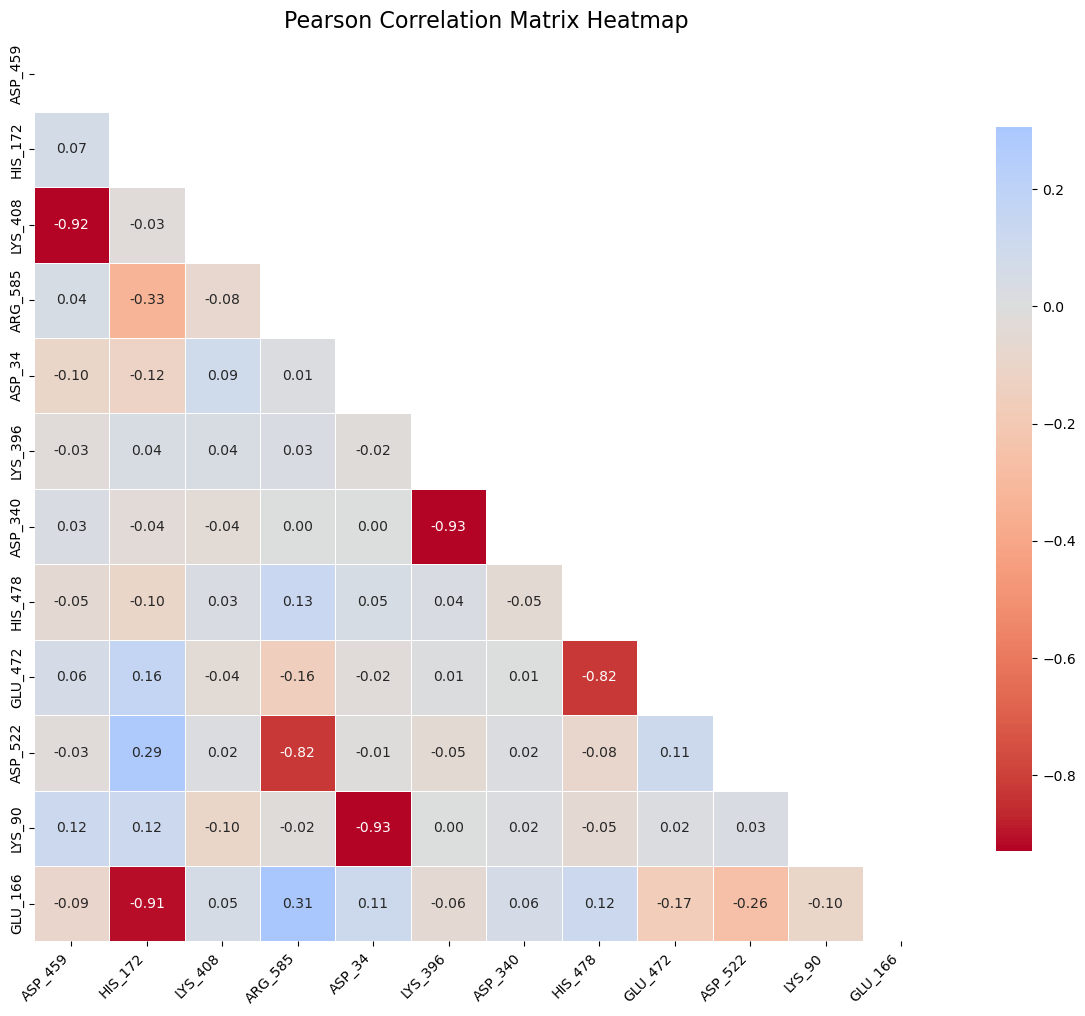

In [11]:
# visualize the matrix using the heatmap
plt.figure(figsize=(12, 10))
# cover upper part
mask = np.triu(np.ones_like(high_corr_matrix, dtype=bool))
labels = high_corr_matrix.map(lambda v: v if v else '')
heatmap = sns.heatmap(high_corr_matrix, mask=mask, annot=labels, fmt='.2f',
                      cmap='coolwarm_r', center=0, square=True, linewidths=.5,
                      cbar_kws={"shrink": .8})

plt.title('Pearson Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./figure/S01_matrix.png')
plt.show()

In [10]:
test_features.to_csv('./processed/correlation/S01_filtered_data.csv', index=False)